# pySELFI: Galaxy survey example

Florent Leclercq<br>
Imperial Centre for Inference and Cosmology, Imperial College London<br>
<a href="mailto:florent.leclercq@polytechnique.org">florent.leclercq@polytechnique.org</a>

In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Some plotting utilities

In [2]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

class MidpointSymLogNorm(colors.SymLogNorm):
    def __init__(self, linthresh, linscale=None, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.SymLogNorm.__init__(self, linthresh=linthresh, linscale=linscale, vmin=vmin, vmax=vmax, clip=clip)    
    
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [3]:
Ndots=2**13
stretch_bottom=6.
stretch_top=1/2.5
truncate_bottom=0.35

bottom = cm.get_cmap('BuGn_r', Ndots)
top = cm.get_cmap('RdPu', Ndots)

interp_top=np.linspace(0, 1, Ndots)**stretch_top
interp_bottom=np.linspace(truncate_bottom, 1, Ndots)**stretch_bottom
newcolors = np.vstack((bottom(interp_bottom),
                       top(interp_top)))
GradientMap = ListedColormap(newcolors, name='GradientMap')

In [4]:
Ndots=2**15
stretch_top=1/3.
stretch_bottom=1.8
top = cm.get_cmap('BrBG', Ndots)
bottom = cm.get_cmap('BrBG', Ndots)

interp_top=np.linspace(0., 1., Ndots)**stretch_top+0.5
interp_bottom=np.linspace(0., 1., Ndots)**stretch_bottom-0.5
newcolors = np.vstack((bottom(interp_bottom),
                       top(interp_top)))

CovarianceMap = ListedColormap(newcolors, name='CovarianceMap')

In [5]:
top = cm.get_cmap('Reds_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0.7, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
Blues_Reds = ListedColormap(newcolors, name='Blues_Reds')

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Purples', 128)

newcolors = np.vstack((top(np.linspace(0.7, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
Purples_Oranges = ListedColormap(newcolors, name='Purples_Oranges')

In [6]:
nContourLevels=3
def get_contours(Z, nBins, confLevels=(.3173, .0455, .0027)):
    Z /= Z.sum()
    nContourLevels = len(confLevels)
    chainLevels = np.ones(nContourLevels+1)
    histOrdered = np.sort(Z.flat)
    histCumulative = np.cumsum(histOrdered)
    nBinsFlat = np.linspace(0., nBins**2, nBins**2)

    for l in range(nContourLevels):
        # Find location of contour level in 1d histCumulative
        temp = np.interp(confLevels[l], histCumulative, nBinsFlat)
        # Find "height" of contour level
        chainLevels[nContourLevels-1-l] = np.interp(temp, nBinsFlat, histOrdered)
        
    return chainLevels

In [7]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': [r"\usepackage{amsmath,amsfonts,amssymb,amsthm}",r"\usepackage{upgreek}"]})
plt.rcParams.update({'font.family': 'serif'})

# Run pySELFI

In [8]:
# We first import the configuration
from model.setup_SBMY import *

[15:51:28|STATUS    ]|Read Fourier grid in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/G_sim.h5'...
[15:51:28|DIAGNOSTIC]==|L0=1000.0, L1=1000.0, L2=1000.0
[15:51:28|DIAGNOSTIC]==|N0=256, N1=256, N2=256, N2_HC=129, N_HC=8454144, NUM_MODES=33743
[15:51:28|STATUS    ]|Read Fourier grid in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/G_sim.h5' done.
[15:51:28|STATUS    ]|Read power spectrum in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/P_exp.h5'...
[15:51:29|DIAGNOSTIC]==|L0=1000.0, L1=1000.0, L2=1000.0
[15:51:29|DIAGNOSTIC]==|N0=256, N1=256, N2=256, N2_HC=129, N_HC=8454144, NUM_MODES=33743
[15:51:29|STATUS    ]|Read power spectrum in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/P_exp.h5' done.
[15:51:29|STATUS    ]|Read Fourier grid in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/G_ss.h5'...
[15:51:29|DIAGNOSTIC]==|L0=1000.0, L1=1000.0, L2=1000.0
[15:51:29|DIAGNOSTIC]==|N0=256, N1=256, 

In [9]:
# We then perform all calculations
# run_simulations() will load from existing pools or perform all the necessary blackbox evaluations
selfi_SBMY.compute_prior()
selfi_SBMY.save_prior()
selfi_SBMY.run_simulations() 
selfi_SBMY.compute_likelihood()
selfi_SBMY.save_likelihood()
selfi_SBMY.compute_posterior()
selfi_SBMY.save_posterior()

[15:51:29|STATUS    ]|Writing prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5'...
[15:51:29|STATUS    ]|Writing prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_0.h5'...
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_0.h5' done.
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_0.h5'...
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_0.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_1.h5'...
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq

[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_13.h5' done.
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_13.h5'...
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_13.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_14.h5'...
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_14.h5' done.
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_14.h5'...
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_14.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file

[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_26.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_27.h5'...
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_27.h5' done.
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_27.h5'...
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_27.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_28.h5'...
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_28.h5' done.
[15:51:29|STATUS    ]|Save pool to data file

[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_40.h5' done.
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_40.h5'...
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_40.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_41.h5'...
[15:51:29|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_41.h5' done.
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_41.h5'...
[15:51:29|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_41.h5' done.
[15:51:29|STATUS    ]|Loading pool from data file

[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_53.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_54.h5'...
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_54.h5' done.
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_54.h5'...
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_54.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_55.h5'...
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_55.h5' done.
[15:51:30|STATUS    ]|Save pool to data file

[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_67.h5' done.
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_67.h5'...
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_67.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_68.h5'...
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_68.h5' done.
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_68.h5'...
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_68.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file

[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_80.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_81.h5'...
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_81.h5' done.
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_81.h5'...
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_81.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_82.h5'...
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_82.h5' done.
[15:51:30|STATUS    ]|Save pool to data file

[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_94.h5' done.
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_94.h5'...
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_94.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_95.h5'...
[15:51:30|STATUS    ]|Loading pool from data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_95.h5' done.
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_95.h5'...
[15:51:30|STATUS    ]|Save pool to data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/pools_SBMY_iter0/pool_95.h5' done.
[15:51:30|STATUS    ]|Loading pool from data file

# Blackbox diagnostics

In [10]:
NORM=50
C_0=NORM*NORM*selfi_SBMY.likelihood.C_0
grad_f=NORM*selfi_SBMY.likelihood.grad_f
Phi_0=NORM*selfi_SBMY.likelihood.Phi_0.Phi
phi_obs=NORM*phi_obs
f_0=NORM*selfi_SBMY.likelihood.f_0
f_20=NORM*selfi_SBMY.likelihood.f_20
f_50=NORM*selfi_SBMY.likelihood.f_50
f_70=NORM*selfi_SBMY.likelihood.f_70
grad_f_20=(f_20-f_0)/Delta_theta
grad_f_50=(f_50-f_0)/Delta_theta
grad_f_70=(f_70-f_0)/Delta_theta
X0,Y0=np.meshgrid(k_ss,k_ss)
X1,Y1=np.meshgrid(k_s,k_ss)
N=Ne

## Summaries at the expansion point and their covariance matrix

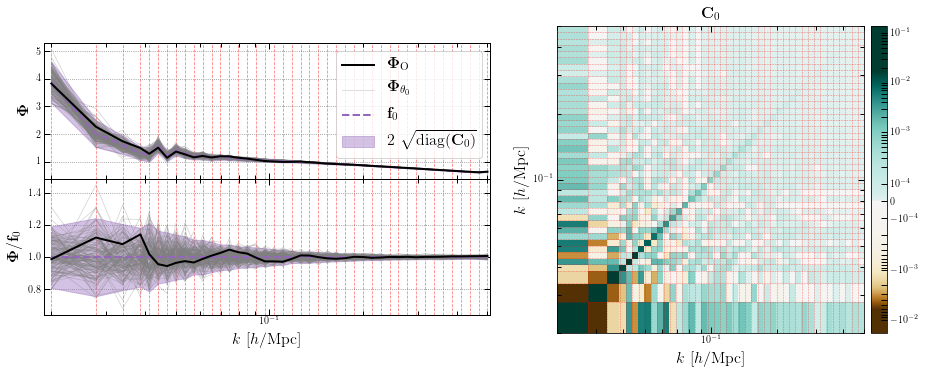

In [11]:
fig = plt.figure(figsize=(13,5))

gs0 = gridspec.GridSpec(2,2, width_ratios=[1.,1.], height_ratios=[1.,1.], wspace=0.1, hspace=0.)
gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0)

gs1 = gridspec.GridSpec(2,2)
gs1.update(top=2.2,bottom=0.)
ax1 = plt.subplot(gs1[-1,1])

ax0.set_xlim([k_ss.min()-0.001,k_ss.max()+0.01])
ax0.semilogx(k_ss,phi_obs,linewidth=2,color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$",zorder=3)
for i in range(N-1):
    ax0.semilogx(k_ss,Phi_0[i],color="C7",alpha=0.35,linewidth=0.7)
ax0.semilogx(k_ss,Phi_0[N-1],color="C7",alpha=0.35,linewidth=0.7,label="$\\boldsymbol{\Phi}_{\\theta_0}$")
ax0.semilogx(k_ss,f_0,linewidth=2,color="C4",linestyle="--",label="$\\textbf{f}_0$",zorder=2)
ax0.fill_between(k_ss,f_0-2*np.sqrt(np.diag(C_0)),
               f_0+2*np.sqrt(np.diag(C_0)),
               color="C4",alpha=0.4,label="2 $\sqrt{\mathrm{diag}(\\textbf{C}_0)}$",zorder=2)
(ymin,ymax)=ax0.get_ylim()
ax0.set_ylim([ymin,ymax])
for i in range(len(k_ss)):
    ax0.plot((k_ss[i],k_ss[i]),(ymin,ymax),linestyle='--',linewidth=0.8,color="red",alpha=0.5,zorder=1)
ax0.yaxis.grid(linestyle=':',color="grey")
ax0.set_ylabel("$\\boldsymbol{\Phi}$",size=16)
ax0.legend(fontsize=16, loc='upper right')
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both',direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='both',direction='in', width=1.0)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='major', length=6)

ax0b.set_xlim([k_ss.min()-0.001,k_ss.max()+0.01])
ax0b.yaxis.grid(linestyle=':',color="grey")
ax0b.semilogx(k_ss,phi_obs/f_0,linewidth=2,color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$",zorder=3)
for i in range(N-1):
    ax0b.semilogx(k_ss,Phi_0[i]/f_0,color="C7",alpha=0.35,linewidth=0.7)
ax0b.semilogx(k_ss,Phi_0[N-1]/f_0,color="C7",alpha=0.35,linewidth=0.7,label="$\\boldsymbol{\Phi}_{\\theta_0}$")
ax0b.semilogx(k_ss,f_0/f_0,linewidth=2,color="C4",linestyle="--",label="$\\textbf{f}_0$",zorder=2)
ax0b.fill_between(k_ss,f_0/f_0-2*np.sqrt(np.diag(C_0))/f_0,
               f_0/f_0+2*np.sqrt(np.diag(C_0))/f_0,
               color="C4",alpha=0.4,label="2 $\sqrt{\mathrm{diag}(\\textbf{C}_0)}$",zorder=2)
(ymin,ymax)=ax0b.get_ylim()
ax0b.set_ylim([ymin,ymax])
for i in range(len(k_ss)):
    ax0b.plot((k_ss[i],k_ss[i]),(ymin,ymax),linestyle='--',linewidth=0.8,color="red",alpha=0.5,zorder=1)
ax0b.set_ylabel("$\\boldsymbol{\Phi}/\\textbf{f}_0$",size=16)
ax0b.set_xlabel("$k$ [$h$/Mpc]",size=16)
ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both',direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='both',direction='in', width=1.0)
for axis in ['top','bottom','left','right']:
    ax0b.spines[axis].set_linewidth(1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='major', length=6)

ax1.set_aspect('equal')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6)
ax1.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.pcolormesh(X0,Y0,C_0,cmap=CovarianceMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=2e-4, linscale=1, vmin=C_0.min(), vmax=C_0.max()))
for i in range(len(k_ss)):
    ax1.plot((k_ss[i],k_ss[i]),(k_ss.min(),k_ss.max()),linestyle='--',linewidth=0.5,color="red",alpha=0.5)
for i in range(len(k_ss)):
    ax1.plot((k_ss.min(),k_ss.max()),(k_ss[i],k_ss[i]),linestyle='--',linewidth=0.5,color="red",alpha=0.5)
ax1.set_title("$\\textbf{C}_0$",size=16)
ax1.set_xlabel("$k$ [$h$/Mpc]",size=16)
ax1.set_ylabel("$k$ [$h$/Mpc]",size=16)
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

In [12]:
np.savez("plots/blackbox_1_SBMY",k_ss=k_ss,X0=X0,Y0=Y0,phi_obs=phi_obs,Phi_0=Phi_0,f_0=f_0,C_0=C_0)

## Gradient of the blackbox

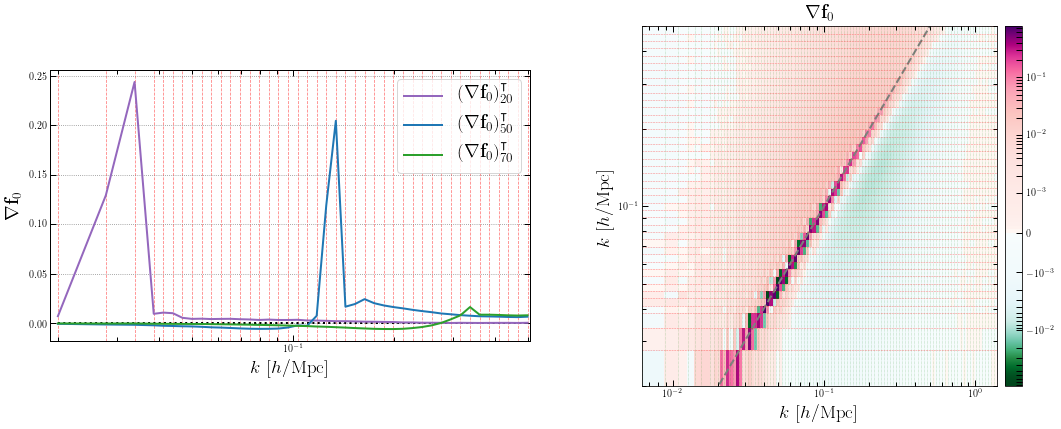

In [13]:
fig = plt.figure(figsize=(15,5))

gs0 = gridspec.GridSpec(1,2, width_ratios=[1.,0.5], height_ratios=[1.], wspace=1.)
gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0])
gs1 = gridspec.GridSpec(1,2)
gs1.update(top=1.,bottom=0.)
ax1 = plt.subplot(gs1[1])

ax0.set_xlim([k_ss.min()-0.001,k_ss.max()+0.01])
ax0.semilogx(k_ss,np.zeros_like(k_ss),linestyle=':',color="black")
ax0.semilogx(k_ss,grad_f_20,linewidth=2,linestyle="-",color="C4",label="$(\\nabla \\textbf{f}_0)^\intercal_{20}$",zorder=2)
ax0.semilogx(k_ss,grad_f_50,linewidth=2,linestyle="-",color="C0",label="$(\\nabla \\textbf{f}_0)^\intercal_{50}$",zorder=2)
ax0.semilogx(k_ss,grad_f_70,linewidth=2,linestyle="-",color="C2",label="$(\\nabla \\textbf{f}_0)^\intercal_{70}$",zorder=2)
(ymin,ymax)=ax0.get_ylim()
ax0.set_ylim([ymin,ymax])
for i in range(len(k_ss)):
    ax0.plot((k_ss[i],k_ss[i]),(ymin,ymax),linestyle='--',linewidth=0.8,color='red',alpha=0.5,zorder=1)
ax0.yaxis.grid(linestyle=':',color="grey")
ax0.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax0.set_ylabel("$\\nabla \\textbf{f}_0$",size=19)
ax0.legend(fontsize=19,loc='upper right')
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both',direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='both',direction='in', width=1.0)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='major', length=6)

ax1.set_xlim([k_s.min(),k_s.max()])
ax1.set_ylim([k_ss.min(),k_ss.max()])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6)
ax1.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.pcolormesh(X1,Y1,grad_f,cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_f.min(), vmax=grad_f.max()))
ax1.plot(k_s,k_s,color='grey',linestyle='--')
for i in range(len(k_s)):
    ax1.plot((k_s[i],k_s[i]),(k_ss.min(),k_ss.max()),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
for i in range(len(k_ss)):
    ax1.plot((k_s.min(),k_s.max()),(k_ss[i],k_ss[i]),linestyle='--',linewidth=0.5,color="red",alpha=0.5)
ax1.set_title("$\\nabla \\textbf{f}_0$",size=19)
ax1.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax1.set_ylabel("$k$ [$h$/Mpc]",size=19)
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

In [14]:
np.savez("plots/blackbox_2_SBMY",k_s=k_s,k_ss=k_ss,X1=X1,Y1=Y1,C_0=C_0,grad_f=grad_f,f_0=f_0,grad_f_20=grad_f_20,grad_f_50=grad_f_50,grad_f_70=grad_f_70)

# Prior optimization

## Define the prior and compute first reconstruction

In [15]:
theta_norm=0.05
k_corr=0.015
selfi_SBMY.prior.theta_norm=theta_norm
selfi_SBMY.prior.k_corr=k_corr
selfi_SBMY.prior.alpha_cv=alpha_cv
selfi_SBMY.compute_prior()
selfi_SBMY.save_prior()
selfi_SBMY.load_prior()
selfi_SBMY.load_likelihood()
selfi_SBMY.compute_posterior()
selfi_SBMY.save_posterior()
prior_theta_mean=selfi_SBMY.prior.mean
prior_theta_covariance=selfi_SBMY.prior.covariance

[15:51:36|STATUS    ]|Writing prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5'...
[15:51:36|STATUS    ]|Writing prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5' done.
[15:51:36|STATUS    ]|Reading prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5'...
[15:51:36|STATUS    ]|Reading prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5' done.
[15:51:36|STATUS    ]|Reading likelihood in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5'...
[15:51:36|STATUS    ]|Reading likelihood from in file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5' done.
[15:51:36|STATUS    ]|Writing posterior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5'...
[15:51:36|STATUS    ]|Writing posterior in data file '/home/leclercq/codes/pyself

In [16]:
# Restrict the posterior to some scales
Nbin_min, Nbin_max = selfi_SBMY.prior.Nbin_min(k_opt_min), selfi_SBMY.prior.Nbin_max(k_opt_max)
k_s=k_s[Nbin_min:Nbin_max]
P_0=P_0[Nbin_min:Nbin_max]
prior_theta_mean=prior_theta_mean[Nbin_min:Nbin_max]
prior_theta_covariance=prior_theta_covariance[Nbin_min:Nbin_max,Nbin_min:Nbin_max]

posterior_theta_mean, posterior_theta_covariance, posterior_theta_icov = selfi_SBMY.restrict_posterior(Nbin_min, Nbin_max)

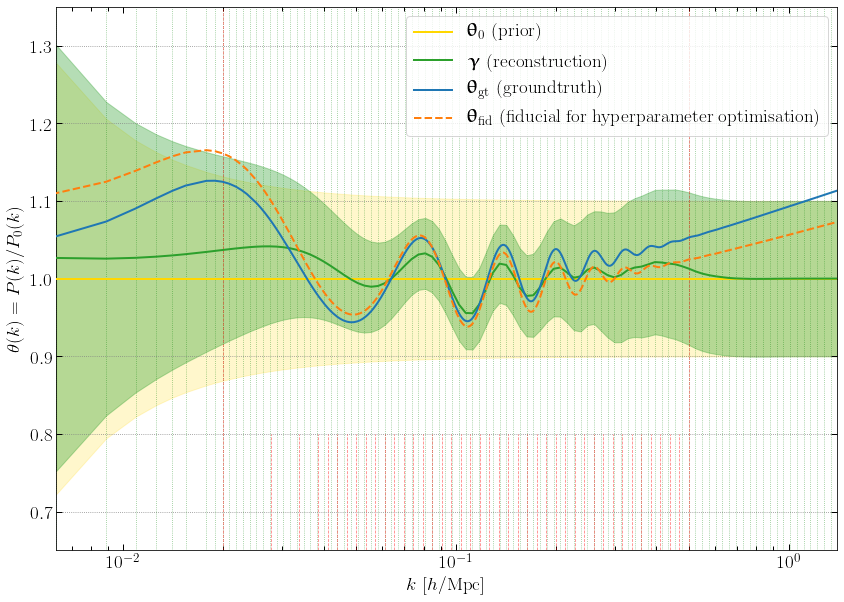

In [17]:
fig, (ax) = plt.subplots(figsize=(14,10))
ax.set_ylim([0.65,1.35])
ax.set_xlim([k_s.min(),k_s.max()])
ax.yaxis.grid(linestyle=':',color="grey")
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.xaxis.set_tick_params(which='major', length=6, labelsize=19)
ax.xaxis.set_tick_params(which='minor', length=4)
ax.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.yaxis.set_tick_params(which='major', length=6, labelsize=19)
ax.semilogx(k_s,prior_theta_mean,linestyle='-',color='gold',label="$\\boldsymbol{\\uptheta}_0$ (prior)",zorder=3)
ax.fill_between(k_s,prior_theta_mean-2*np.sqrt(np.diag(prior_theta_covariance)),
               prior_theta_mean+2*np.sqrt(np.diag(prior_theta_covariance)),
               color='gold',alpha=0.20)
ax.semilogx(k_s,posterior_theta_mean,color='C2',label="$\\boldsymbol{\\upgamma}$ (reconstruction)",zorder=3)
ax.fill_between(k_s,posterior_theta_mean-2*np.sqrt(np.diag(posterior_theta_covariance)),
               posterior_theta_mean+2*np.sqrt(np.diag(posterior_theta_covariance)),
               color='C2',alpha=0.35)
ax.semilogx(k_th,theta_groundtruth_th,color='C0',label="$\\boldsymbol{\\uptheta}_\mathrm{gt}$ (groundtruth)",zorder=3)
ax.semilogx(k_th,theta_fiducial_th,color='C1',linestyle="--",label="$\\boldsymbol{\\uptheta}_\mathrm{fid}$ (fiducial for hyperparameter optimisation)",zorder=3)
(ymin,ymax)=ax.get_ylim()
ax.set_ylim([ymin,ymax])
for i in range(len(k_s)):
    ax.plot([k_s[i],k_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(1,len(k_ss)-1):
    ax.plot([k_ss[i],k_ss[i]],[ymin,0.8],linestyle='--',linewidth=0.8,color='red',alpha=0.5)
ax.plot([k_ss[0],k_ss[0]],[ymin,ymax],linestyle='--',linewidth=0.8,color='red',alpha=0.5)
ax.plot([k_ss[len(k_ss)-1],k_ss[len(k_ss)-1]],[ymin,ymax],linestyle='--',linewidth=0.8,color='red',alpha=0.5)
ax.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax.set_ylabel("$\\theta(k) = P(k)/P_0(k)$",size=19)
ax.legend(loc='upper right',fontsize=19)

## Optimize prior

In [18]:
# Test the optimization target function (log-posterior of hyperparameters)
selfi_SBMY.logposterior_hyperparameters(theta_fiducial, Nbin_min, Nbin_max, theta_norm, k_corr,
                                 theta_norm_mean=theta_norm_mean, theta_norm_std=theta_norm_std,
                                 k_corr_mean=k_corr_mean, k_corr_std=k_corr_std)

405.9669203725824

In [19]:
# Prepare the hyperparameters plot
theta_norm_min=0.025
theta_norm_max=0.10
k_corr_min=0.012
k_corr_max=0.020
meshsize=100
X0,Y0=np.meshgrid(np.linspace(theta_norm_min,theta_norm_max,meshsize),np.linspace(k_corr_min,k_corr_max,meshsize))
Z=np.zeros((meshsize,meshsize))

for i in range(meshsize):
    for j in range(meshsize):
        Z[i][j]=selfi_SBMY.logposterior_hyperparameters(theta_fiducial, Nbin_min, Nbin_max, X0[i][j], Y0[i][j], alpha_cv)
Z-=Z.max()
Z=np.exp(Z)
Z_contours = get_contours(Z, meshsize)

Text(0, 0.5, '$k_\\mathrm{corr}$ [$h$/Mpc]')

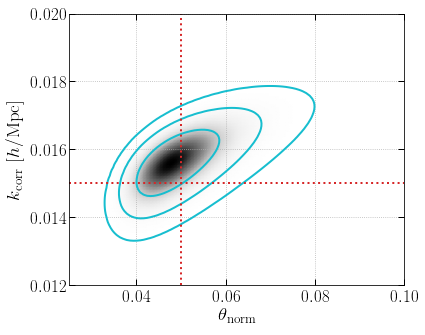

In [20]:
fig, (ax) = plt.subplots(figsize=(6,5), ncols=1)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.xaxis.set_tick_params(which='major', length=6, labelsize=17)
ax.xaxis.set_tick_params(which='minor', length=4)
ax.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.yaxis.set_tick_params(which='major', length=6, labelsize=17)

pcm = ax.pcolormesh(X0,Y0,Z, cmap="Greys", shading='gouraud')
ax.grid(linestyle=':')
ax.contour(Z, Z_contours,
            extent=[theta_norm_min,theta_norm_max,k_corr_min,k_corr_max], colors='C9')
ax.plot([theta_norm,theta_norm],[k_corr_min,k_corr_max],linestyle=':',color='C3')
ax.plot([theta_norm_min,theta_norm_max],[k_corr,k_corr],linestyle=':',color='C3')
ax.set_xlabel("$\\theta_\mathrm{norm}$",size=19)
ax.set_ylabel("$k_\mathrm{corr}$ [$h$/Mpc]",size=19)

In [21]:
# Perform the prior optimization
x0=[theta_norm,k_corr]
selfi_SBMY.optimize_prior(theta_fiducial,k_opt_min,k_opt_max,x0=x0,
                   theta_norm_min=theta_norm_min,theta_norm_max=theta_norm_max,
                   theta_norm_mean=theta_norm_mean, theta_norm_std=theta_norm_std,
                   k_corr_min=k_corr_min,k_corr_max=k_corr_max,
                   k_corr_mean=k_corr_mean,k_corr_std=k_corr_std)
selfi_SBMY.save_prior()
selfi_SBMY.save_posterior()
theta_norm=selfi_SBMY.prior.theta_norm
k_corr=selfi_SBMY.prior.k_corr
prior_theta_mean, prior_theta_covariance = selfi_SBMY.prior.mean, selfi_SBMY.prior.covariance
prior_theta_mean=prior_theta_mean[Nbin_min:Nbin_max]
prior_theta_covariance=prior_theta_covariance[Nbin_min:Nbin_max,Nbin_min:Nbin_max]
posterior_theta_mean, posterior_theta_covariance, posterior_theta_icov = selfi_SBMY.restrict_posterior(Nbin_min, Nbin_max)
print(selfi_SBMY.logposterior_hyperparameters(theta_fiducial, Nbin_min, Nbin_max, theta_norm, k_corr, alpha_cv))
print(theta_norm,k_corr)

      fun: -407.0691367229693
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.02661096, -0.12656341])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 111
      nit: 9
   status: 0
  success: True
        x: array([0.04783037, 0.01560423])
[15:53:13|STATUS    ]|Writing prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5'...
[15:53:13|STATUS    ]|Writing prior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5' done.
[15:53:13|STATUS    ]|Writing posterior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5'...
[15:53:13|STATUS    ]|Writing posterior in data file '/home/leclercq/codes/pyselfi/examples/simbelmyne/sims/selfi_SBMY_iter0.h5' done.
407.0322957232217
0.047830372264902665 0.015604228546591409


Text(0, 0.5, '$k_\\mathrm{corr}$ [$h$/Mpc]')

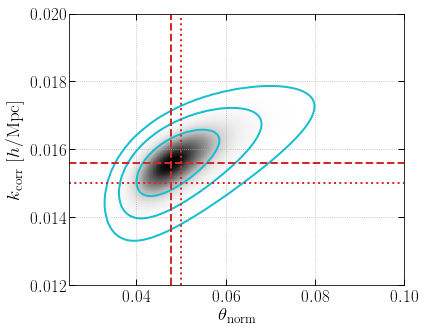

In [22]:
fig, (ax) = plt.subplots(figsize=(6,5), ncols=1)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.xaxis.set_tick_params(which='major', length=6, labelsize=17)
ax.xaxis.set_tick_params(which='minor', length=4)
ax.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.yaxis.set_tick_params(which='major', length=6, labelsize=17)

pcm = ax.pcolormesh(X0,Y0,Z, cmap="Greys", shading='gouraud')
ax.grid(linestyle=':')
ax.contour(Z, Z_contours,
            extent=[theta_norm_min,theta_norm_max,k_corr_min,k_corr_max], colors='C9')
ax.plot([x0[0],x0[0]],[k_corr_min,k_corr_max],color='C3',linestyle=':')
ax.plot([theta_norm_min,theta_norm_max],[x0[1],x0[1]],color='C3',linestyle=':')
ax.plot([theta_norm,theta_norm],[k_corr_min,k_corr_max],linestyle='--',color='C3')
ax.plot([theta_norm_min,theta_norm_max],[k_corr,k_corr],linestyle='--',color='C3')
ax.set_xlabel("$\\theta_\mathrm{norm}$",size=19)
ax.set_ylabel("$k_\mathrm{corr}$ [$h$/Mpc]",size=19)

In [23]:
np.savez("plots/hyperparameters_SBMY",X0=X0,Y0=Y0,Z=Z,Z_contours=Z_contours,theta_norm=theta_norm,k_corr=k_corr)

## Plot optimized prior

In [24]:
X2,Y2=np.meshgrid(k_s,k_s)
prior_covariance=np.diag(P_0).dot(prior_theta_covariance).dot(np.diag(P_0))

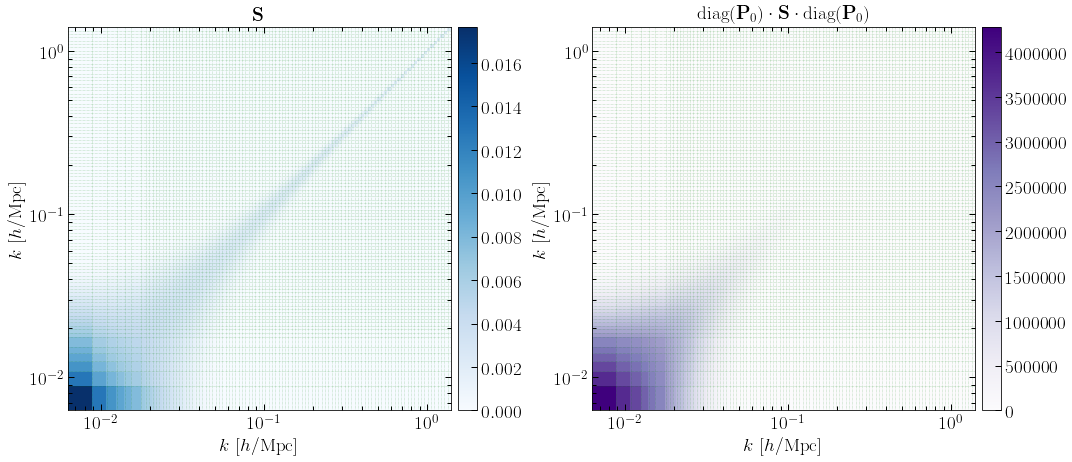

In [25]:
fig, (ax0, ax1) = plt.subplots(figsize=(15,15), ncols=2)

ax0.set_aspect('equal')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6, labelsize=19)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6, labelsize=19)
ax0.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax0)
ax0_cb = divider.new_horizontal(size="5%", pad=0.10)
im0 = ax0.pcolormesh(X2,Y2,prior_theta_covariance,cmap="Blues")
for i in range(len(k_s)):
    ax0.plot((k_s[i],k_s[i]),(k_s.min(),k_s.max()),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
for i in range(len(k_s)):
    ax0.plot((k_s.min(),k_s.max()),(k_s[i],k_s[i]),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
ax0.set_title("$\\textbf{S}$",size=19)
ax0.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax0.set_ylabel("$k$ [$h$/Mpc]",size=19)
fig.add_axes(ax0_cb)
cbar0 = fig.colorbar(im0, cax=ax0_cb)
cbar0.ax.tick_params(axis='y', direction='in', width=1.0, length=6, labelsize=19)

ax1.set_aspect('equal')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6, labelsize=19)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6, labelsize=19)
ax1.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.pcolormesh(X2,Y2,prior_covariance,cmap="Purples")
for i in range(len(k_s)):
    ax1.plot((k_s[i],k_s[i]),(k_s.min(),k_s.max()),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
for i in range(len(k_s)):
    ax1.plot((k_s.min(),k_s.max()),(k_s[i],k_s[i]),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
ax1.set_title("$\mathrm{diag}(\\textbf{P}_0) \cdot \\textbf{S} \cdot \mathrm{diag}(\\textbf{P}_0)$",size=19)
ax1.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax1.set_ylabel("$k$ [$h$/Mpc]",size=19)
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6, labelsize=19)

fig.tight_layout()

In [26]:
np.savez("plots/prior_SBMY",X2=X2,Y2=Y2,k_s=k_s,prior_theta_covariance=prior_theta_covariance,prior_covariance=prior_covariance)

## Plot posterior

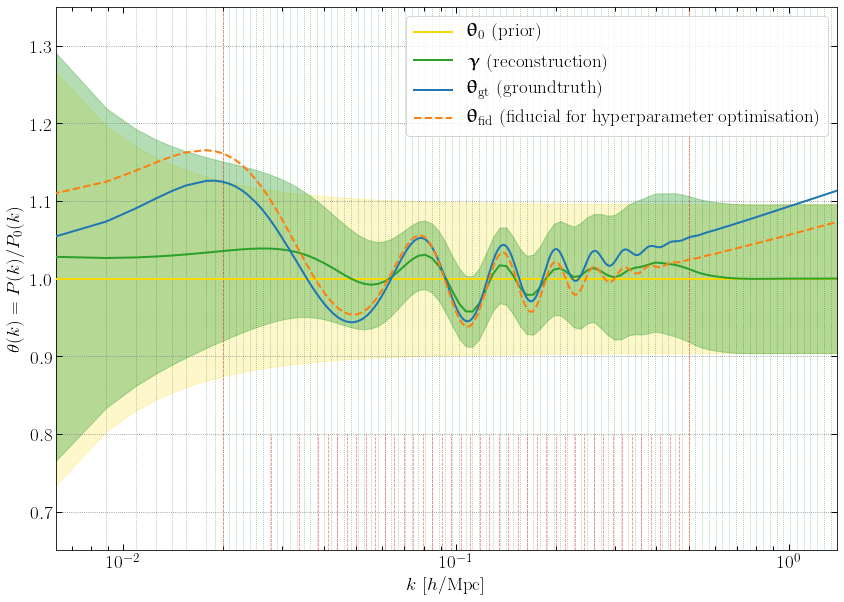

In [27]:
fig, (ax) = plt.subplots(figsize=(14,10))
ax.set_ylim([0.65,1.35])
ax.set_xlim([k_s.min(),k_s.max()])
ax.yaxis.grid(linestyle=':',color="grey")
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.xaxis.set_tick_params(which='major', length=6, labelsize=19)
ax.xaxis.set_tick_params(which='minor', length=4)
ax.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax.yaxis.set_tick_params(which='major', length=6, labelsize=19)
ax.semilogx(k_s,prior_theta_mean,linestyle='-',color='gold',label="$\\boldsymbol{\\uptheta}_0$ (prior)",zorder=3)
ax.fill_between(k_s,prior_theta_mean-2*np.sqrt(np.diag(prior_theta_covariance)),
               prior_theta_mean+2*np.sqrt(np.diag(prior_theta_covariance)),
               color='gold',alpha=0.20)
ax.semilogx(k_s,posterior_theta_mean,color='C2',label="$\\boldsymbol{\\upgamma}$ (reconstruction)",zorder=3)
ax.fill_between(k_s,posterior_theta_mean-2*np.sqrt(np.diag(posterior_theta_covariance)),
               posterior_theta_mean+2*np.sqrt(np.diag(posterior_theta_covariance)),
               color='C2',alpha=0.35)
ax.semilogx(k_th,theta_groundtruth_th,color='C0',label="$\\boldsymbol{\\uptheta}_\mathrm{gt}$ (groundtruth)",zorder=3)
ax.semilogx(k_th,theta_fiducial_th,color='C1',linestyle="--",label="$\\boldsymbol{\\uptheta}_\mathrm{fid}$ (fiducial for hyperparameter optimisation)",zorder=3)
(ymin,ymax)=ax.get_ylim()
ax.set_ylim([ymin,ymax])
for i in range(len(k_s)):
    ax.plot([k_s[i],k_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(1,len(k_ss)-1):
    ax.plot([k_ss[i],k_ss[i]],[ymin,0.8],linestyle='--',linewidth=0.8,color='red',alpha=0.5)
ax.plot([k_ss[0],k_ss[0]],[ymin,ymax],linestyle='--',linewidth=0.8,color='red',alpha=0.5)
ax.plot([k_ss[len(k_ss)-1],k_ss[len(k_ss)-1]],[ymin,ymax],linestyle='--',linewidth=0.8,color='red',alpha=0.5)
ax.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax.set_ylabel("$\\theta(k) = P(k)/P_0(k)$",size=19)
ax.legend(loc='upper right',fontsize=19)

In [28]:
np.savez("plots/posterior_1_SBMY",k_s=k_s,k_ss=k_ss,
         prior_theta_mean=prior_theta_mean,prior_theta_covariance=prior_theta_covariance,
         posterior_theta_mean=posterior_theta_mean,posterior_theta_covariance=posterior_theta_covariance,
         k_th=k_th,theta_groundtruth_th=theta_groundtruth_th,theta_fiducial_th=theta_fiducial_th)

In [29]:
posterior_covariance=np.diag(P_0).dot(posterior_theta_covariance).dot(np.diag(P_0))

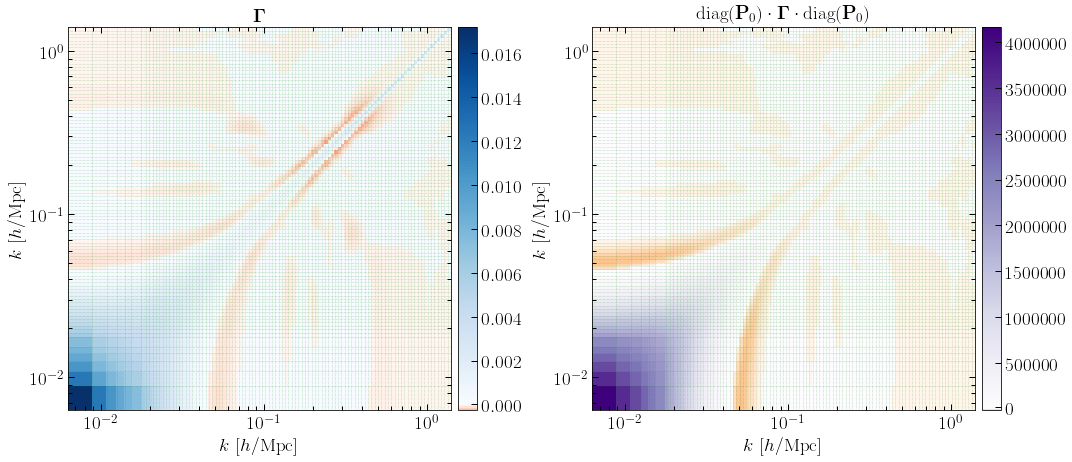

In [30]:
fig, (ax0, ax1) = plt.subplots(figsize=(15,15), ncols=2)

ax0.set_aspect('equal')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6, labelsize=19)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6, labelsize=19)
ax0.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax0)
ax0_cb = divider.new_horizontal(size="5%", pad=0.10)
im0 = ax0.pcolormesh(X2,Y2,posterior_theta_covariance,cmap=Blues_Reds,norm=MidpointNormalize(midpoint=0.))
for i in range(len(k_s)):
    ax0.plot((k_s[i],k_s[i]),(k_s.min(),k_s.max()),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
for i in range(len(k_s)):
    ax0.plot((k_s.min(),k_s.max()),(k_s[i],k_s[i]),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
ax0.set_title("$\\boldsymbol{\Gamma}$",size=19)
ax0.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax0.set_ylabel("$k$ [$h$/Mpc]",size=19)
fig.add_axes(ax0_cb)
cbar0 = fig.colorbar(im0, cax=ax0_cb)
cbar0.ax.tick_params(axis='y', direction='in', width=1.0, length=6, labelsize=19)

ax1.set_aspect('equal')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6, labelsize=19)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6, labelsize=19)
ax1.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
im1 = ax1.pcolormesh(X2,Y2,posterior_covariance,cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
for i in range(len(k_s)):
    ax1.plot((k_s[i],k_s[i]),(k_s.min(),k_s.max()),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
for i in range(len(k_s)):
    ax1.plot((k_s.min(),k_s.max()),(k_s[i],k_s[i]),linestyle=':',linewidth=0.5,color="green",alpha=0.5)
ax1.set_title("$\mathrm{diag}(\\textbf{P}_0) \cdot \\boldsymbol{\Gamma} \cdot \mathrm{diag}(\\textbf{P}_0)$",size=19)
ax1.set_xlabel("$k$ [$h$/Mpc]",size=19)
ax1.set_ylabel("$k$ [$h$/Mpc]",size=19)
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6, labelsize=19)

fig.tight_layout()

In [31]:
np.savez("plots/posterior_2_SBMY",X2=X2,Y2=Y2,k_s=k_s,posterior_theta_covariance=posterior_theta_covariance,posterior_covariance=posterior_covariance)